In [1]:
import pandas as pd


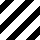
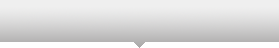
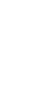
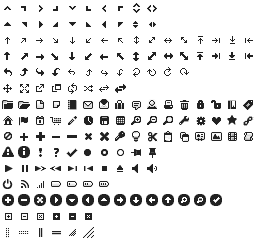
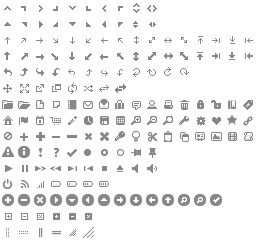
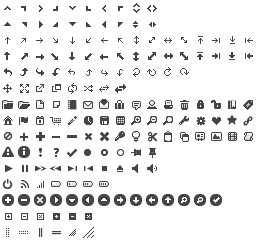
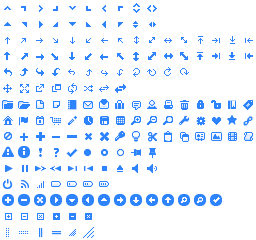
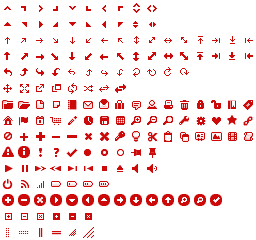
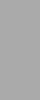
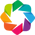
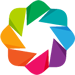
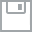
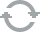
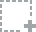
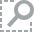
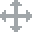
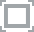
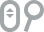

In [2]:
from bokeh.sampledata.glucose import data
from bokeh.plotting import *

In [3]:
output_notebook()

In [4]:
p1 = figure(x_axis_type="datetime")

p1.line(data.index, data['glucose'], color='red', legend='glucose')
p1.line(data.index, data['isig'], color='blue', legend='isig')

p1.title = "Glucose Measurements"

show(p1)

In [5]:
day = data.ix['2010-10-06']
highs = day[day['glucose'] > 180]
lows = day[day['glucose'] < 80]

p2 = figure(x_axis_type="datetime")

p2.line(day.index, day['glucose'], line_color="gray", line_dash="4 4", line_width=1, legend="glucose")
p2.scatter(highs.index, highs['glucose'], size=6, color='tomato', legend="high")
p2.scatter(lows.index, lows['glucose'], size=6, color='navy', legend="low")

p2.title = "Glucose Range"
p2.xgrid.grid_line_color=None
p2.ygrid.grid_line_alpha=0.5

show(p2)

In [6]:
data['inrange'] = (data['glucose'] < 180) & (data['glucose'] > 80)
window = 30.5*288 #288 is average number of samples in a month
inrange = pd.rolling_sum(data.inrange, window)
inrange = inrange.dropna()
inrange = inrange/float(window)

p3 = figure(x_axis_type="datetime")

p3.line(inrange.index, inrange, line_color="navy")

p3.title = "Glucose In-Range Rolling Sum"

show(p3)